In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
iris=pd.read_csv(r"C:\Users\prayaas\Documents\MLProjects\IRIS\Iris.csv")

In [4]:
iris.head(10) #show the first 10 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris.info() #checks for inconsistency as there are no null values anywhere we can process data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.drop('Id',axis=1,inplace=True)

In [7]:
iris.head(2) #id column dropped by above 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


Figure(432x288)


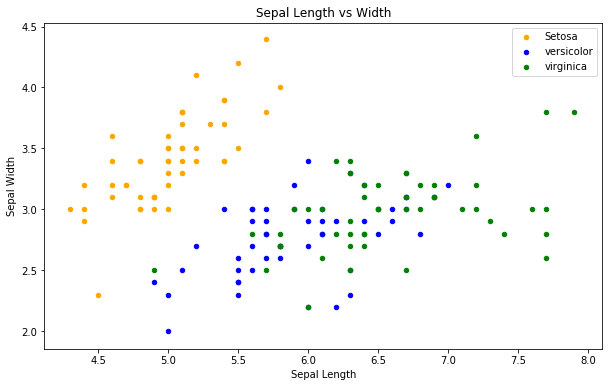

In [8]:
fig=iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica',ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Width')
fig=plt.gcf()
print(plt.gcf())
fig.set_size_inches(10,6)
plt.show()

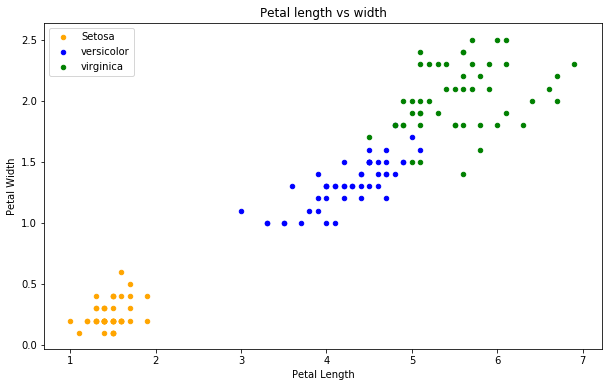

In [9]:
fig=iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange',label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal length vs width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

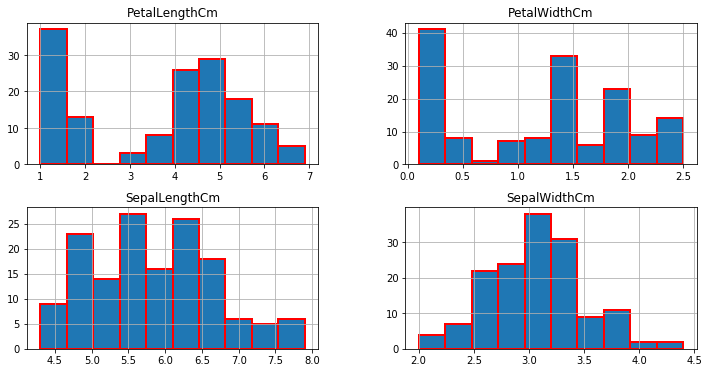

In [10]:
iris.hist(edgecolor='red',linewidth=2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

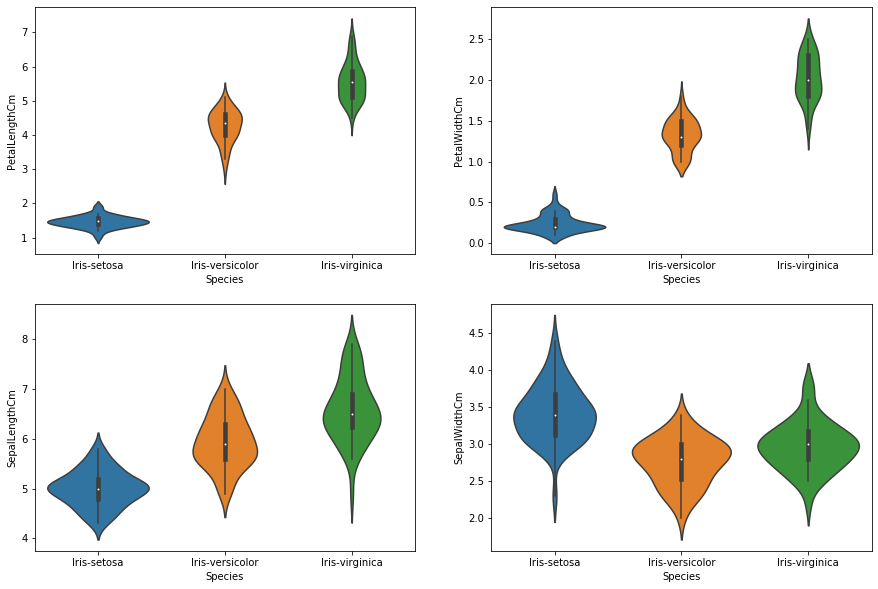

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sn.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sn.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sn.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sn.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [13]:
iris.shape

(150, 5)

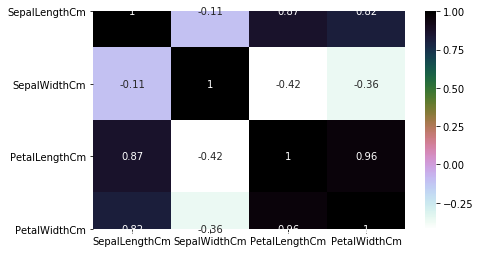

In [14]:
plt.figure(figsize=(7,4))
sn.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')

plt.show()

In [15]:
train, test = train_test_split(iris, test_size =0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [16]:
train_X = train[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_Y=train.Species
test_X=test[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_Y=test.Species

In [17]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
138,6.0,3.0,4.8,1.8
94,5.6,2.7,4.2,1.3


In [18]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
65,6.7,3.1,4.4,1.4
107,7.3,2.9,6.3,1.8


In [19]:
train_Y.head()

138     Iris-virginica
94     Iris-versicolor
13         Iris-setosa
106     Iris-virginica
67     Iris-versicolor
Name: Species, dtype: object

In [20]:
test_Y.head()

65     Iris-versicolor
107     Iris-virginica
99     Iris-versicolor
58     Iris-versicolor
100     Iris-virginica
Name: Species, dtype: object

In [22]:
#SVM
model=svm.SVC() #selecting algorithm for model
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the SVM is: ',metrics.accuracy_score(prediction,test_Y))

The accuracy of the SVM is:  0.9777777777777777


C:\Users\prayaas\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of Logistic Regression is: ',metrics.accuracy_score(prediction,test_Y))

The accuracy of Logistic Regression is:  0.9777777777777777


C:\Users\prayaas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prayaas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [25]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of decision tree is : ',metrics.accuracy_score(prediction,test_Y))

The accuracy of decision tree is :  0.9555555555555556


In [28]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of KNN is: ',metrics.accuracy_score(prediction,test_Y))

The accuracy of KNN is:  0.9555555555555556


([<matplotlib.axis.XTick at 0x1c09c5b7608>,
 <a list of 10 Text xticklabel objects>)

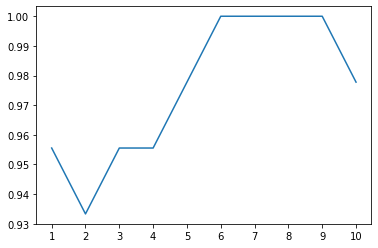

In [30]:
#Now lets check accuracy of KNN for changing number of neighbors
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index,a)
plt.xticks(x)

In [31]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]


In [33]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)
train_x_p=train_p[['PetalLengthCm','PetalWidthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalLengthCm','PetalWidthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s=train_s[['SepalLengthCm','SepalWidthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalLengthCm','SepalWidthCm']]
test_y_s=test_s.Species

In [35]:
model=svm.SVC()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of SVM for petals is: ',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('Accuracy ofSVM for sepals:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of SVM for petals is:  0.9777777777777777
Accuracy ofSVM for sepals: 0.8


C:\Users\prayaas\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\prayaas\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [36]:
model=LogisticRegression()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of SVM for petals is: ',metrics.accuracy_score(prediction,test_y_p))

model=LogisticRegression()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('Accuracy ofSVM for sepals:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of SVM for petals is:  0.6888888888888889
Accuracy ofSVM for sepals: 0.6444444444444445


C:\Users\prayaas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prayaas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\prayaas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prayaas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [37]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of SVM for petals is: ',metrics.accuracy_score(prediction,test_y_p))

model=DecisionTreeClassifier()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('Accuracy ofSVM for sepals:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of SVM for petals is:  0.9555555555555556
Accuracy ofSVM for sepals: 0.6666666666666666


In [38]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of SVM for petals is: ',metrics.accuracy_score(prediction,test_y_p))

model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('Accuracy ofSVM for sepals:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of SVM for petals is:  0.9777777777777777
Accuracy ofSVM for sepals: 0.7333333333333333
